# Downstream Exploitation of Space Data
## Python Crash Course Part 4: Fits and Databases

### Learning Objectives

You will: 
* know what a .fits file is and how to open it
* know how to query objects with Lightkurve
* be able to download light curves from Lightkurve and MAST

There are not exercises in this part as it is covered by sessions 1, 2, and 5.

### fits files

Working with .fits files (Flexible Image Transport System) is common in astronomy. Working with them in Python is very convenient thanks to the astropy library.

Let's import the astropy library:

In [1]:
from astropy.io import fits

In [2]:
# opening the fits file
fits_file = 'hlsp_qlp_tess_ffi_s0055-0000000027768398_tess_v01_llc.fits' # this fits file is a TESS observation
hdul = fits.open(fits_file)

In [3]:
# printing information about the file
hdul.info()

Filename: hlsp_qlp_tess_ffi_s0055-0000000027768398_tess_v01_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  LIGHTCURVE    1 BinTableHDU     68   3781R x 13C   [D, J, E, E, E, J, J, E, E, E, E, E, E]   


In [4]:
# exploring header of the file
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
NEXTEND =                    1 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
ORIGIN  = 'MIT/QLP '           / institution responsible for creating this file 
TELESCOP= 'TESS    '           / telescope                                      
INSTRUME= 'TESS Photometer'    / detector type                                  
FILTER  = 'TESS    '           / the filter used for the observations           
OBJECT  = 'TIC 27768398'       / string version of TICID                        
TICID   =             27768398 / unique TESS target identifier                  
SECTOR  =                   

In [5]:
# exploring data of the file
data = hdul[1].data
data

FITS_rec([(2797.10276789, 226028, 0.99710745, 0.99726176, 0.00431045, 4096, 117, 280.17343, 1667.1917, -5144.3 , 290.23, 1.000338 , 1.0001096),
          (2797.10971235, 226029, 0.9965531 , 0.999919  , 0.00431045, 4096, 118, 280.17075, 1667.1875, -4997.57, 388.51, 0.9996862, 1.0034373),
          (2797.1166568 , 226030, 0.9982227 , 1.001418  , 0.00431045, 4096,   0, 280.17105, 1667.187 , -4874.35, 266.08, 1.0018725, 1.004075 ),
          ...,
          (2824.24849601, 229937, 0.9978321 , 1.0045476 , 0.00431045, 4096,   0, 280.16266, 1667.148 , -1627.16, 326.74, 1.0010575, 1.0035715),
          (2824.25544038, 229938, 0.99635535, 1.0033318 , 0.00431045, 4096,   0, 280.16586, 1667.1503, -1608.69, 259.19, 0.9997192, 1.0040399),
          (2824.26238474, 229939, 0.99555355, 1.0028018 , 0.00431045, 4096,   0, 280.16278, 1667.1504, -1718.97, 307.87, 1.0003816, 0.9998974)],
         dtype=(numpy.record, [('TIME', '>f8'), ('CADENCENO', '>i4'), ('SAP_FLUX', '>f4'), ('KSPSAP_FLUX', '>f4'), ('KSP

In [6]:
# closing the file after use
hdul.close()

Let's plot the data:

In [7]:
import numpy as np # a math library
import matplotlib.pyplot as plt

In [8]:
with fits.open(fits_file, memmap=False) as hdul: # nevermind this for now, we will talk about it during session 5
    data = hdul[1].data
    time = data['TIME']
    flux = data['SAP_FLUX']
            
    flux_mean = np.mean(flux)
    flux_std = np.std(flux)
    
    time_no_outl = time[np.abs(flux - flux_mean) < 10 * flux_std]
    flux_no_outl = flux[np.abs(flux - flux_mean) < 10 * flux_std]

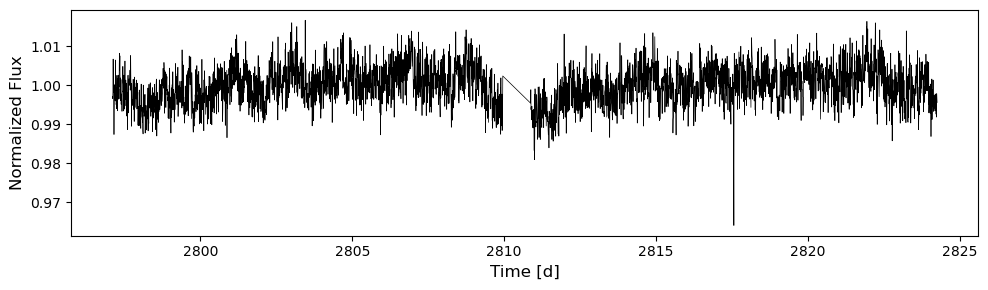

In [9]:
fig, ax = plt.subplots(figsize=(10, 3))
    
ax.plot(time_no_outl, flux_no_outl, color='black', linewidth=0.5)
ax.set_xlabel('Time [d]', fontsize=12)
ax.set_ylabel('Normalized Flux', fontsize=12)

plt.tight_layout()

This .fits file contained a light curve (see notes for the SSE course) of a single star, which is very different from the content of the .fits file we have opened during session 1.

### Lightkurve

Another great astronomical library is lightkurve. It can do many things, of which the most basic one is querying astronomical objects.

As usual, we first import libraries:

In [10]:
import lightkurve as lk

In [11]:
search = lk.search_lightcurve('TIC 320586229', author='QLP') #the first argument is the object we are looking for, the second is a science product
search

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 26,2020,QLP,1800,320586229,0.0
1,TESS Sector 40,2021,QLP,600,320586229,0.0
2,TESS Sector 53,2022,QLP,600,320586229,0.0
3,TESS Sector 79,2024,QLP,200,320586229,0.0
4,TESS Sector 80,2024,QLP,200,320586229,0.0


In [13]:
lc = search[1].download() # opening the second one (extended TESS mission starts from Sector 27 and data is better quality)
lc

time,flux,flux_err,cadenceno,sap_flux,kspsap_flux,kspsap_flux_err,quality,orbitid,sap_x,sap_y,sap_bkg,sap_bkg_err,kspsap_flux_sml,kspsap_flux_lag
,,,,,,,,,pix,pix,,,,
Time,float32,float32,int32,float32,float32,float32,int32,int32,float32,float32,float32,float32,float32,float32
2390.6602655308766,1.0027474164962769,0.0019736625254154205,167500,1.0027474,1.0002087,0.0019736625,4096,87,1773.16064453125,2007.541259765625,-53813.5,375.81,1.0001241,1.0001338
2390.667209921587,1.001049518585205,0.0019736625254154205,167501,1.0010495,0.99852943,0.0019736625,4096,88,1773.1619873046875,2007.5355224609375,-53703.46,367.65,0.99855095,0.998537
2390.674154311643,1.0008164644241333,0.0019736625254154205,167502,1.0008165,0.9983111,0.0019736625,6144,0,1773.162353515625,2007.541259765625,-53662.71,371.52,0.99847466,0.99799675
2390.681098701095,0.9998059272766113,0.0019736625254154205,167503,0.9998059,0.99731725,0.0019736625,4096,0,1773.161376953125,2007.5430908203125,-53754.89,328.61,0.99739116,0.99718046
2390.688043090547,0.9988620281219482,0.0019736625254154205,167504,0.998862,0.9963896,0.0019736625,4096,0,1773.1634521484375,2007.539794921875,-53593.74,454.96,0.99659294,0.99634635
2390.6949874800002,0.9997276067733765,0.0019736625254154205,167505,0.9997276,0.99726695,0.0019736625,6144,0,1773.1636962890625,2007.5428466796875,-53458.91,406.62,0.99738723,0.99705535
2390.701931869453,1.0017046928405762,0.0019736625254154205,167506,1.0017047,0.99925303,0.0019736625,4096,0,1773.1639404296875,2007.5419921875,-53430.51,320.99,0.9991035,0.99928975
2390.708876258905,1.0052814483642578,0.0019736625254154205,167507,1.0052814,1.0028347,0.0019736625,6144,0,1773.1632080078125,2007.5433349609375,-53405.91,426.32,1.0025032,1.0028337


In [14]:
# two columns we are interested in
time = lc['time'].value # note how here column names are not in capital
flux = lc['sap_flux'].value

Let's see how it looks:

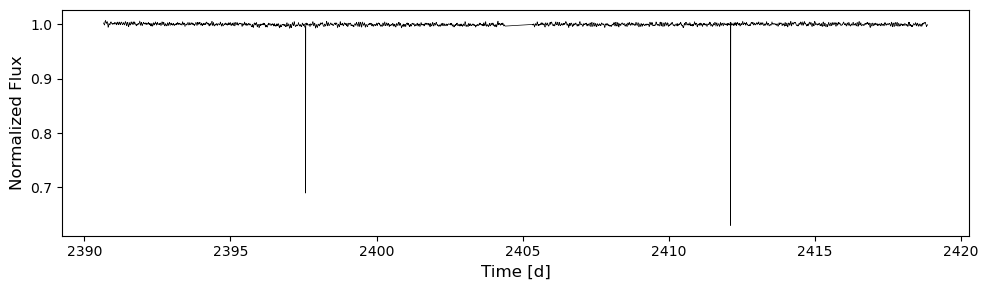

In [15]:
fig, ax = plt.subplots(figsize=(10, 3))
    
ax.plot(time, flux, color='black', linewidth=0.5)
ax.set_xlabel('Time [d]', fontsize=12)
ax.set_ylabel('Normalized Flux', fontsize=12)

plt.tight_layout()

The light curve contains outliers, which prevent us from taking a good look. Let's remove them (more in session 5):

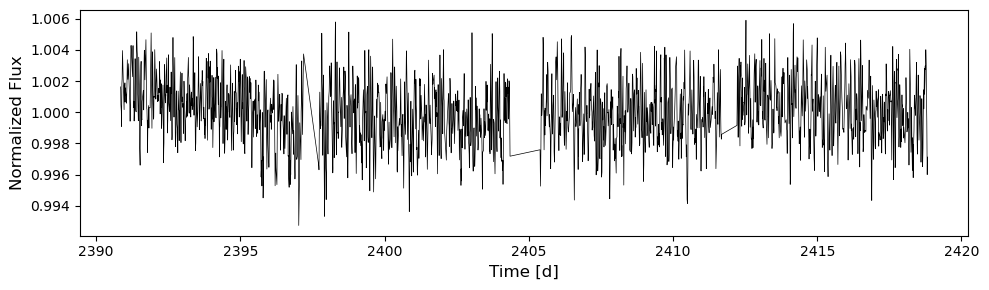

In [16]:
quality_mask = lc.quality

good_quality_mask = (quality_mask == 0)
time1 = time[good_quality_mask]
flux1 = flux[good_quality_mask]
        
flux_mean = np.mean(flux1)
flux_std = np.std(flux1)
    
time_no_outl = time1[np.abs(flux1 - flux_mean) < 10 * flux_std]
flux_no_outl = flux1[np.abs(flux1 - flux_mean) < 10 * flux_std]

fig, ax = plt.subplots(figsize=(10, 3))
    
ax.plot(time_no_outl, flux_no_outl, color='black', linewidth=0.5)
ax.set_xlabel('Time [d]', fontsize=12)
ax.set_ylabel('Normalized Flux', fontsize=12)

plt.tight_layout()

We can also save it as a .fits file:

In [17]:
lc = search[1].download(quality_bitmask='default', flux_column='sap_flux', download_dir='./test') 
# the dowload_dir argument will specify where the .fits file is saved

### MAST

MAST is an astronomical data archive, which contains data from several space missions, including Hubble and TESS. We can use it to download data for multiple objects, in contrast to downloaing light curves one by one like we just did.

In [18]:
from astroquery.mast import Observations

In [19]:
tic_ids = [320586229] # this would be a list of object IDs for TESS
# for didactic purposes, there is just object in this list but you can include several (we will use it during session 5)

In [20]:
obsTable = Observations.query_criteria(provenance_name='QLP',
                                       target_name=tic_ids)
data = Observations.get_product_list(obsTable)
download_lc = Observations.download_products(data)

This has downloaded all available TESS light curves for this object in a folder called mastDownload, you can check its contents to make sure.

This is still impractical (and too slow) when downloading hundreds to millions of light curves, there are other ways to do that via MAST but we will not need it for this course :)